# Linear Regression

Linear regression is a method that allows us to make predictions based on input features.

We will cover:
1. **Theory**: Key concepts of linear regression and its goals.
2. **Metrics**: How we measure the performance of the model.
3. **Implementation**: We will implement linear regression using two methods:
   - Normal Equation
   - Gradient Descent

## What is Linear Regression?

Linear regression is used to predict a continuous target value ($y$) from input features ($X$). The model assumes that the target variable is a linear combination of the features:

$$
y = w_1 \cdot x_1 + w_2 \cdot x_2 + \dots + w_n \cdot x_n + b
$$

Where:
- $(x_1, x_2, \dots, x_n)$ are the input features
- $(w_1, w_2, \dots, w_n)$ are the weights (parameters) that the model learns
- $(b)$ is the bias term (a constant)

The goal of linear regression is to find the best weights $(w_1, w_2, \dots, w_n)$ and bias $(b)$ so that the predicted $(y)$ is as close as possible to the actual value of $(y)$.

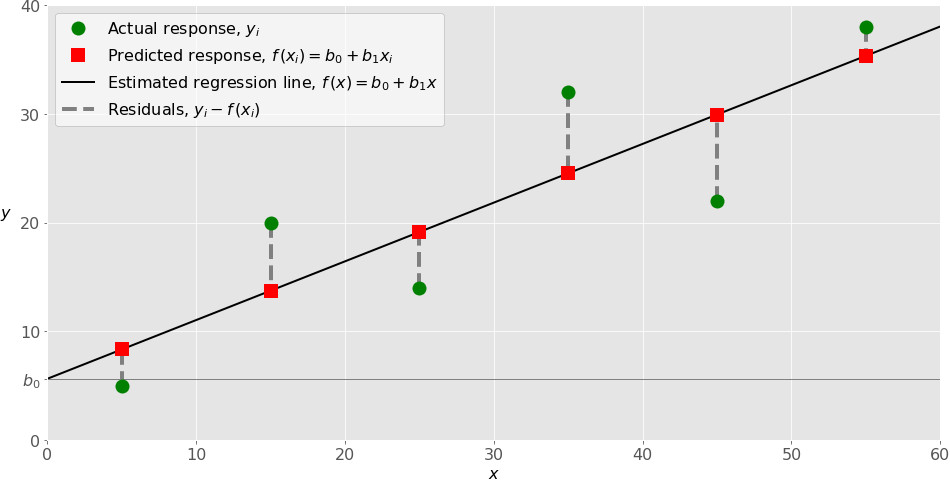

### Loss Function: Mean Squared Error (MSE)

The difference between the predicted value $y_{\text{pred}}$ and the real value $y_{\text{true}}$ is called the **error**. To measure the overall error of the model, we use **Mean Squared Error (MSE)**:

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

Where $m$ is the number of examples.

### Metric: R-squared ($R^2$)

Another useful metric is **R-squared ($R^2$)**. It tells us how well our model fits the data. The formula for $R^2$ is:

$$
R^2 = 1 - \frac{\sum (y_{\text{true}} - y_{\text{pred}})^2}{\sum (y_{\text{true}} - \bar{y})^2}
$$

Here, $\bar{y}$ is the mean of the true values of $y$. The closer $R^2$ is to 1, the better the model.


# 1. Normal Equation for Linear Regression

## Method 1: Normal Equation

In linear regression, we want to find the best weights $w$ and bias $b$ that minimize the difference between the predicted values and the actual values. This difference is measured by the loss function, which is typically the **Mean Squared Error (MSE)**. To minimize this loss function, we can use the **Normal Equation**, which gives us a closed-form solution for the weights and bias.

### Deriving the Normal Equation

The linear regression model can be expressed as:

$$
\hat{y} = X w + b
$$

Where:
- $X$ is the matrix of input features (with dimensions $m \times n$ where $m$ is the number of training examples, and $n$ is the number of features),
- $w$ is the vector of weights (with dimensions $n \times 1$),
- $b$ is the bias term (which can be absorbed into $X$ by adding an extra column of ones to $X$),
- $\hat{y}$ is the vector of predicted values (with dimensions $m \times 1$).

The goal is to minimize the **Mean Squared Error (MSE)**, which is defined as:

$$
MSE(w) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

To minimize this, we take the gradient of $MSE(w)$ with respect to $w$ and set it equal to zero. This gives us the equation:

$$
\frac{\partial}{\partial w} \left( X w - y \right)^2 = 0
$$

This simplifies to:

$$
X^T X w = X^T y
$$

Now, we solve for $w$ by multiplying both sides by the inverse of $X^T X$:

$$
w = (X^T X)^{-1} X^T y
$$

This is known as the **Normal Equation**. It provides a way to directly compute the optimal weights $w$ without requiring iterative methods like gradient descent.

### Final Formula

The formula for the Normal Equation is:

$$
w = (X^T X)^{-1} X^T y
$$

This formula allows us to compute the weights in one step, assuming that the matrix $X^T X$ is invertible. If $X^T X$ is not invertible (i.e., if it is singular or has linearly dependent columns), we may need to use techniques like regularization or remove collinear features.

### Implementation in Python

We will now implement the Normal Equation in Python to solve a linear regression problem:


In [23]:
# Define a class for Linear Regression using the Normal Equation
class NormalLR:
    def __init__(self):
        self.weight = None

    def fit(self,X,y):
        """
        Fit the model using the normal equation.

        Parameters:
        - X: The input feature matrix, where each row is an example and each column is a feature.
        - y: The target values (actual outputs) for each example in X.
        """
        ones_coluns = np.ones((X.shape[0],1))
        X_b = np.concatenate((ones_coluns,X),axis=1)

        self.weight = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


    def predict(self,X):
        """
        Predict target values using the fitted model.

        Parameters:
        - X: The input feature matrix for which predictions are to be made.

        Returns:
        - Predictions for each example in X.
        """
        ones_coluns = np.ones((X.shape[0],1))
        X_b = np.concatenate((ones_coluns,X),axis=1)

        return X_b.dot(self.weight)

In [24]:
def generate_synthetic(size,dim, noise):
    """
    Generate synthetic linear data with some noise.

    Arguments:
    - size: Number of data points (examples) to generate.
    - dim: Number of features (dimensions) for each data point.
    - noise: Noise level to add randomness to the target values, simulating real-world data.

    Returns:
    - X: Features matrix of shape (size, dim).
    - y: Target values (labels) corresponding to each example in X.
    """
    X = np.random.randn(size,dim)
    w = np.random.randn(dim+1)
    noise = noise* np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X,y = generate_synthetic(1000,6,0.1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regr = NormalLR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 0.011071276628703188
R2: 0.998134146617501


# 2. Gradient Descent for Linear Regression

### Method 2: Gradient Descent

When we have a very large dataset, the **Normal Equation** method (used previously) can be slow or even impossible due to memory limitations. In these cases, we use a different method called **Gradient Descent**.

### What is Gradient Descent?

**Gradient Descent** is an optimization algorithm that helps us minimize a function by making small changes to the parameters (weights $w$) in the direction that reduces the error the most. The function we want to minimize is usually the **cost function** or **loss function** — in our case, the **Mean Squared Error (MSE)**.

The idea behind Gradient Descent is simple:
- We start with random values for the weights $w$.
- We then calculate the gradient (or slope) of the cost function with respect to the weights.
- Using this gradient, we adjust the weights step by step, moving them in the direction where the error decreases.

This process repeats iteratively until we find weights that minimize the error.

### How Gradient Descent Works

At each step of Gradient Descent, we update the weights $w$ according to the following rule:

$$
w = w - \alpha \cdot \nabla J(w)
$$

Where:
- $w$ is the vector of weights (parameters),
- $\alpha$ is the **learning rate**, which controls how large the step is at each iteration,
- $\nabla J(w)$ is the **gradient** of the cost function $J(w)$ with respect to the weights.

The gradient $\nabla J(w)$ tells us the direction in which the error is increasing. So, to minimize the error, we move the weights in the opposite direction of the gradient — hence, the negative sign in the formula.

### Key Points:
- **Learning rate ($\alpha$)**: This is a very important parameter. If the learning rate is too large, the algorithm may overshoot the minimum and not converge. If it's too small, the algorithm will take too long to converge.
- **Iterations**: The process continues until the algorithm converges (when further changes in weights do not reduce the error significantly).

### How to Calculate the Gradient

For linear regression, the cost function is the **Mean Squared Error (MSE)**. The gradient of the MSE with respect to the weights $w$ is:

$$
\nabla J(w) = \frac{2}{m} X^T (X w - y)
$$

Where:
- $X$ is the matrix of input features,
- $y$ is the vector of actual target values,
- $m$ is the number of training examples.

This gradient tells us how much to change the weights at each step to reduce the error.

### Summary of the Gradient Descent Algorithm:
1. **Initialize weights** $w$ randomly.
2. **Calculate the gradient** of the cost function with respect to the weights.
3. **Update the weights** using the formula: $w = w - \alpha \cdot \nabla J(w)$.
4. Repeat steps 2-3 until the algorithm converges (the changes in weights become very small).

### Implementation

We will now implement the Gradient Descent algorithm in Python to solve a linear regression problem.


In [26]:
# Define a class for Linear Regression using Gradient Descent
class GradientLR:

    def __init__(self, alpha, iterations):
        """
        Initialize the class with a learning rate (alpha) and number of iterations.

        Parameters:
        - alpha (float): Learning rate, which controls the step size for weight updates.
        - iterations (int): Number of iterations, or steps, that Gradient Descent will take to optimize the weights.
        """
        self.alpha = alpha
        self.iterations = iterations
        self.weight = None
        self.bias = None

    def fit(self,X,y):
        """
        Train the linear regression model using Gradient Descent.

        Parameters:
        - X (np.ndarray): Input features for the training data, where each row is an example and each column is a feature.
        - y (np.ndarray): Target values (or labels) for each training example in X.
        """

        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weight) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weight -= self.alpha * dw
            self.bias -= self.alpha * db
    def predict(self,X):
        """
        Make predictions using the trained model.

        Parameters:
        - X (np.ndarray): Input features for the testing data, where each row is an example to predict.

        Returns:
        - np.ndarray: Predicted values for each input example in X.
        """
        return np.dot(X, self.weight) + self.bias



In [27]:
model = GradientLR(0.01,10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 0.011071276628702536
R2: 0.9981341466175011


# 3. Testing on Real Data

Now we will test both models on a real dataset. Let's load the **Boston Housing** dataset and compare the performance of both methods.


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

path = "HousingData.csv"
dataframe = pd.read_csv(path)
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

path = "HousingData.csv"
dataframe = pd.read_csv(path).dropna()
X = dataframe.drop("MEDV",axis=1)
y = dataframe["MEDV"].values.ravel() #instead of using ravel() we may use .to_numpy(). This function flattens the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [31]:
X_train.shape

(315, 13)

In [32]:
regr = NormalLR()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 31.454047664950885
R2: 0.627084994167319


In [33]:
model = GradientLR(0.01,10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")


MSE: 31.455430819180844
R2: 0.6270685956747235


In [34]:
model.weight

array([-1.03087085,  1.0148098 ,  0.17567705,  0.50138143, -1.92890679,
        2.96847023, -0.605649  , -2.98471564,  2.02866504, -2.01352768,
       -2.1113278 ,  0.85544806, -2.83657622])

In [37]:
model.bias

22.244191509655792

In [38]:
regr.weight

array([22.24414122, -1.03108483,  1.01533025,  0.17713199,  0.50121574,
       -1.92942421,  2.96830887, -0.60556928, -2.98496637,  2.03135423,
       -2.01670315, -2.1114222 ,  0.85547655, -2.83659263])

In [16]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


# 4. Sklearn Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

In [40]:
print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")

MSE: 31.454047664950764
R2: 0.6270849941673204


In [41]:
regr.coef_

array([-1.03108483,  1.01533025,  0.17713199,  0.50121574, -1.92942421,
        2.96830887, -0.60556928, -2.98496637,  2.03135423, -2.01670315,
       -2.1114222 ,  0.85547655, -2.83659263])

In [21]:
regr.intercept_

22.24414122479756

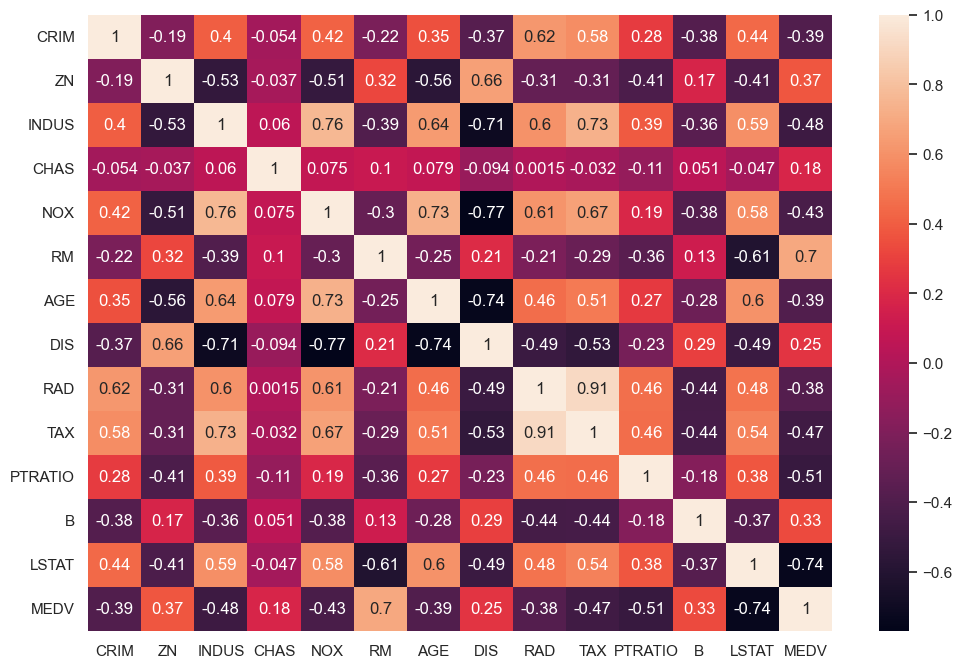

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,8))
corr_matrix = dataframe.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()